# Predicting breast cancer using machine learning

This notebook looks into using different machine learning models and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has breast cancer based on medical metrics.

We're going to take the following approach:

1. Problem definition  
2. Data
3. Evaluation
4. Features  
5. Modelling
6. Experimentation  

## 1. Problem definition

Given data about breast cancer we are trying to determine whether that person has cancer or not.

## 2. Data

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

Link: https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

## 3. Evaluation

We are trying to create a model that can bring `93%` accuracy rate on our test data or new data about breast cancer data.

## 4. Features

* diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign)
* mean_radius: mean of distances from center to points on the perimeter
* mean_texture: standard deviation of gray-scale values
* mean_perimeter: mean size of the core tumor
* mean_area: ???
* mean_smoothness: mean of local variation in radius lengths

**QUESTIONS TO BE ASKED:**

* What are the units in? 
* Answer: mm
* Is the data describing the lumps?
* Answer: ???
* Lower numbers = positive for cancer. Why?
* Answer: ???
* Why out-of-the-box hyperparameters of a model perform better than tuned ones?
* Answer: ???

In [1]:
#import sys
#!{sys.executable} -m pip install seaborn

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [4]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
len(df)

569

In [7]:
df.diagnosis.value_counts() # 62.74% are positive

1    357
0    212
Name: diagnosis, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


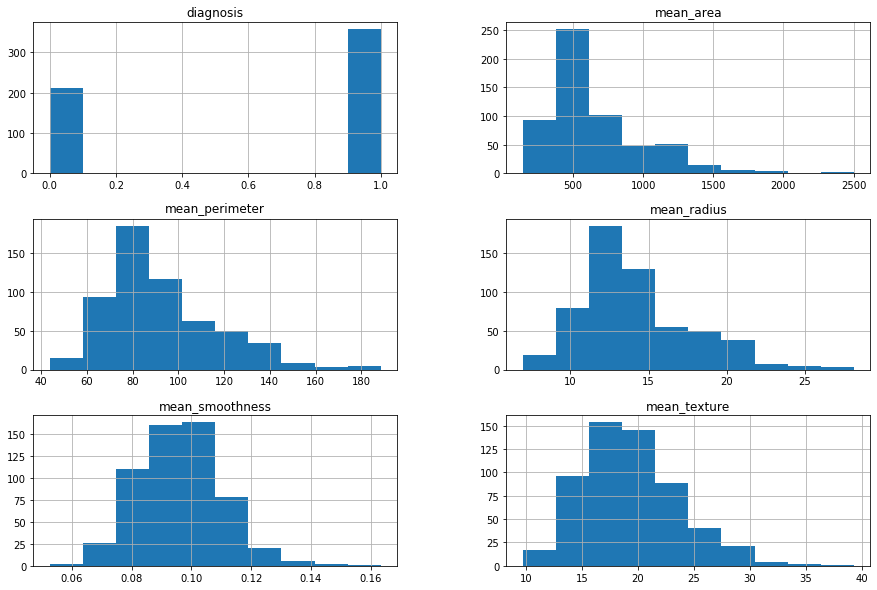

In [9]:
df.hist(figsize=(15, 10));

In [10]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


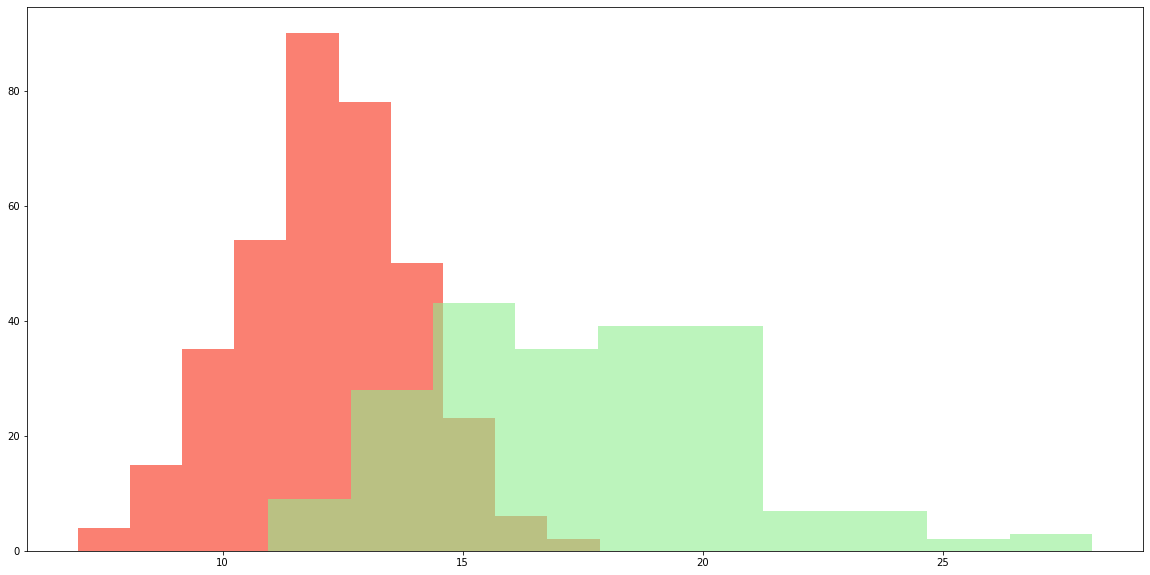

In [11]:
# Plot diagnosis vs mean_radius
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(df.mean_radius[df.diagnosis==1], color='Salmon');
ax.hist(df.mean_radius[df.diagnosis==0], color='lightgreen', alpha=0.6);

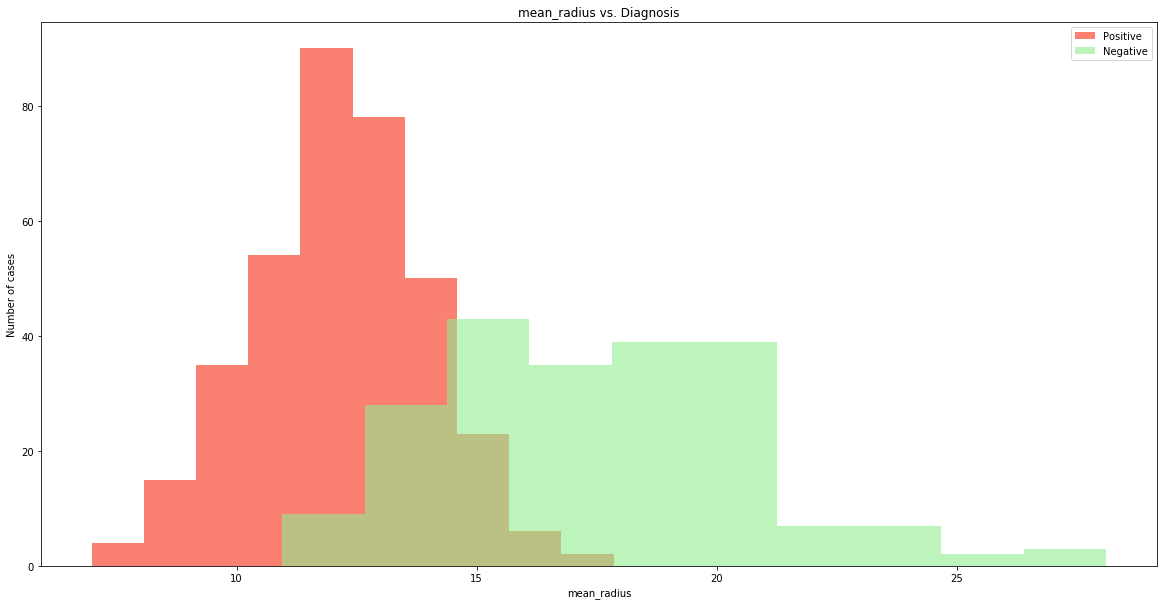

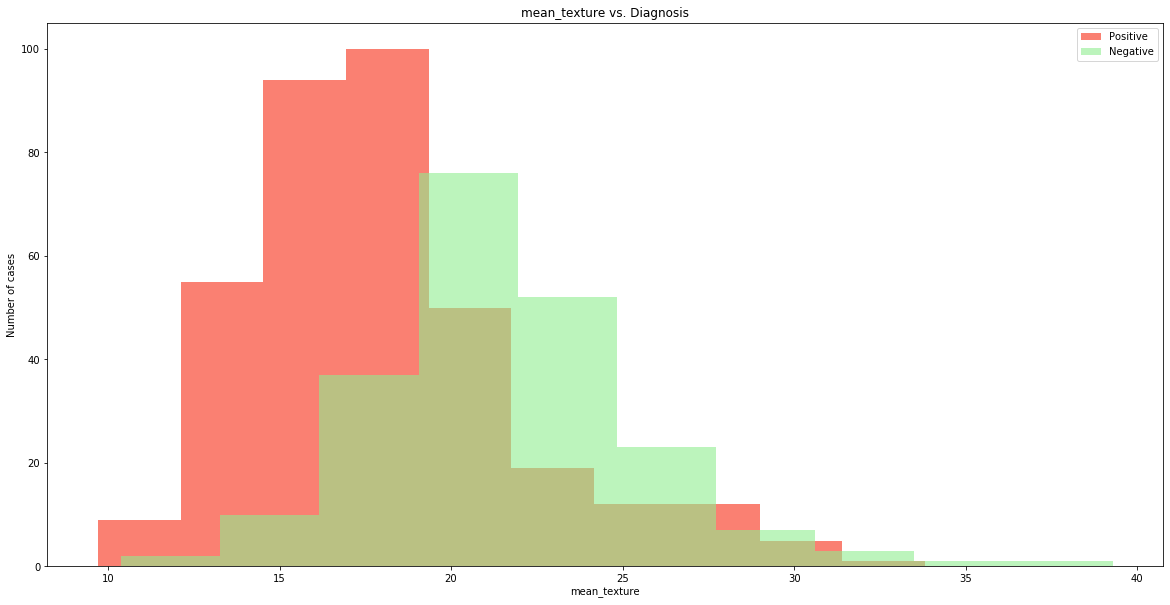

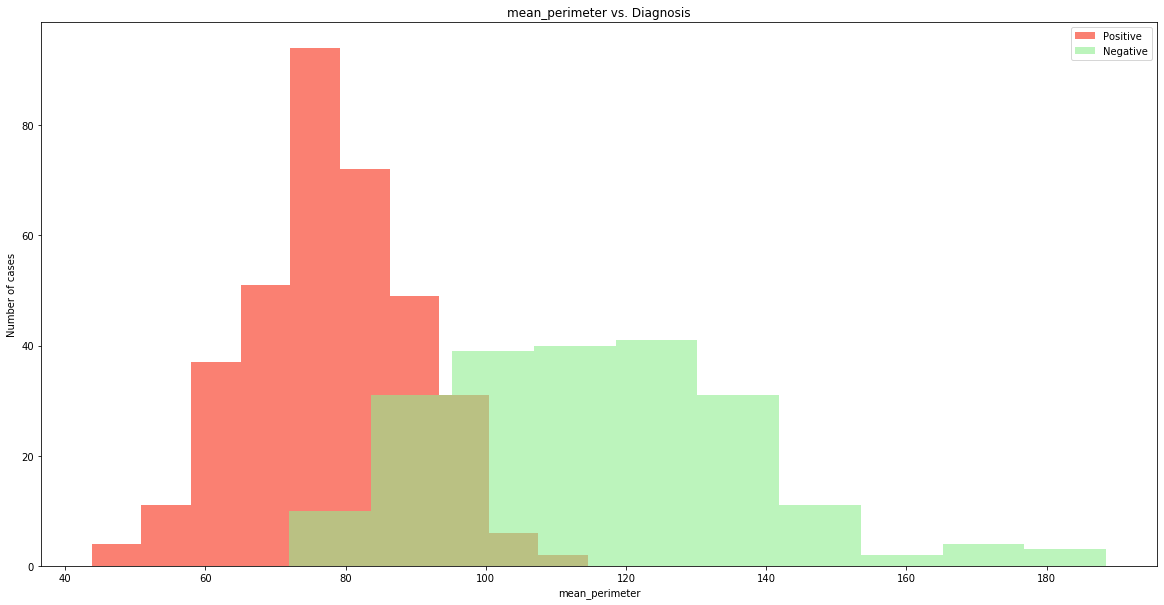

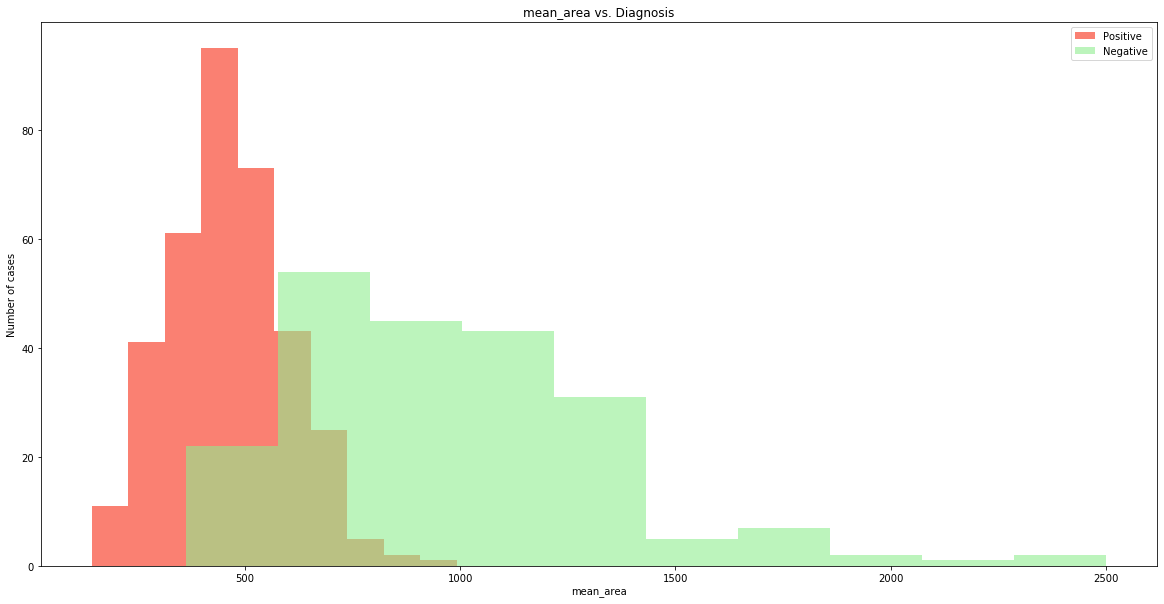

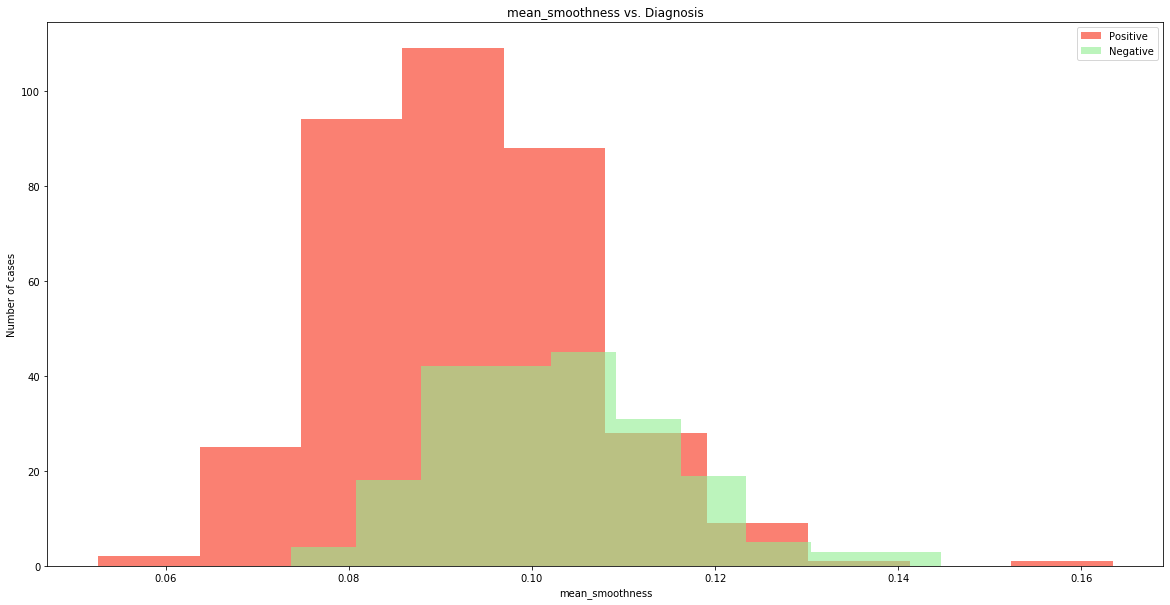

In [12]:
# Plot hist of all data
for col in df.loc[:,df.columns!='diagnosis']:
    # Plot diagnosis vs mean_radius
    fig, ax = plt.subplots(figsize=(20, 10))
    histo_1 = ax.hist(df[col][df.diagnosis==1], color='Salmon');
    ax.hist(df[col][df.diagnosis==0], color='lightgreen', alpha=0.6);
    plt.xlabel(col)
    plt.ylabel("Number of cases")
    plt.legend(["Positive", "Negative"])
    plt.title(f'{col} vs. Diagnosis')

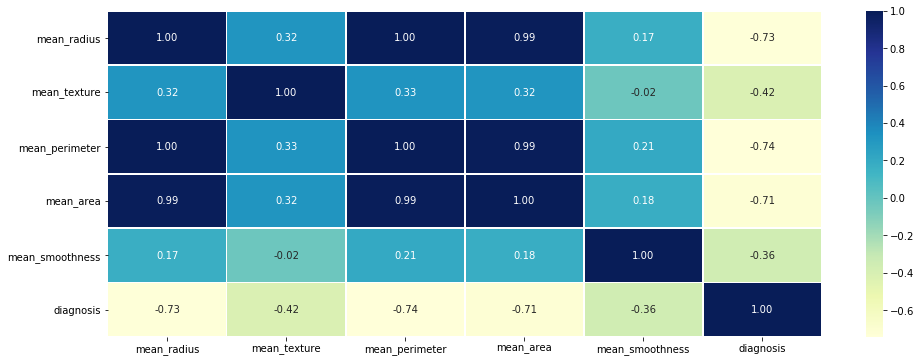

In [13]:
# Build a correlational matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),
                linewidths=0.75,
                fmt='.2f',
                cmap='YlGnBu',
                annot=True)

In [14]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
df[df['mean_smoothness'] > 0.15]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
504,9.268,12.87,61.49,248.7,0.1634,1


In [16]:
df[(df['mean_smoothness'] > 0.10) & (df['diagnosis'] == 1)].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
20,13.080,15.71,85.63,520.0,0.1075,1
21,9.504,12.44,60.34,273.9,0.1024,1
48,12.050,14.63,78.04,449.3,0.1031,1
60,10.170,14.88,64.55,311.9,0.1134,1
61,8.598,20.98,54.66,221.8,0.1243,1


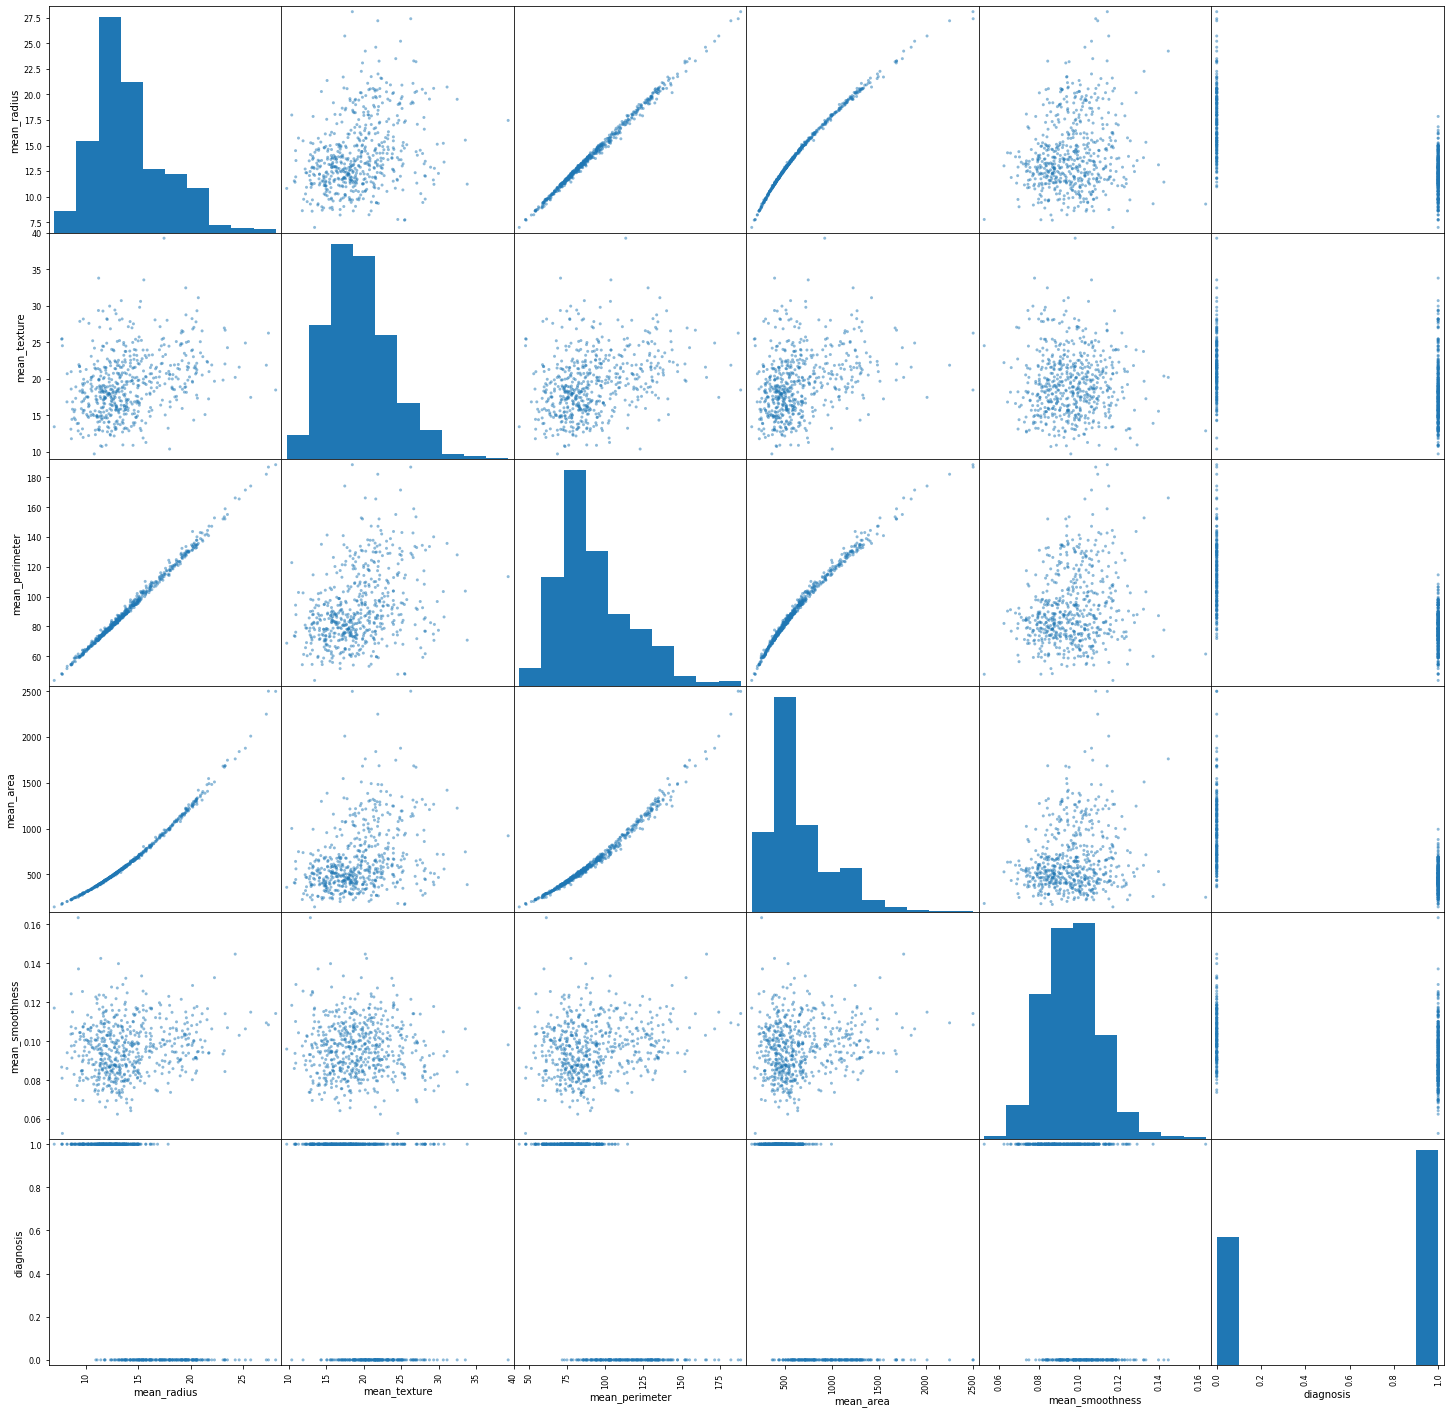

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix_plot = scatter_matrix(df, figsize=(25,25))

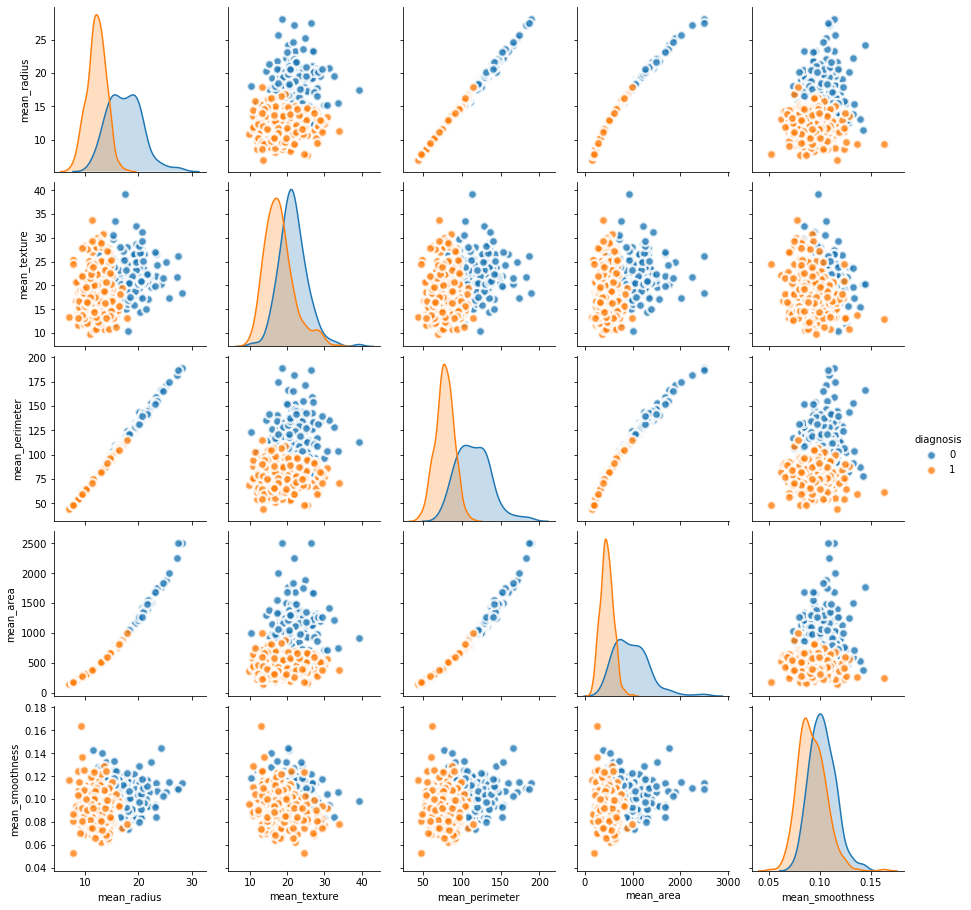

In [18]:
df_pairplot = sns.pairplot(df, hue = 'diagnosis', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.8))

## 5. Modelling

In [19]:
# Random seed
np.random.seed(42)

# Split into X and y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Linear Regression
lg = LinearRegression(n_jobs=-1)

# Fit the model
lg.fit(X_train, y_train)

# Score the model
lg.score(X_test, y_test)

0.6536446483035234

In [20]:
len(df[df['diagnosis'] == 1]), len(df[df['diagnosis'] == 0])

(357, 212)

In [21]:
212 / (357 + 212)

0.37258347978910367

In [22]:
# Let's test different models
model_dict = {'RandomForestClassifier': RandomForestClassifier(),
             'XGB': xgb.XGBClassifier(),
             'LinearRegression': LinearRegression(),
             'KNeighborsClassifier': KNeighborsClassifier(),
             'SVC': SVC()}
model_results = {}

def test_model(X_train, X_test, y_train, y_test):
    np.random.seed(42)
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        model_results[name] = model.score(X_test, y_test)
    return model_results

In [23]:
test_model(X_train, X_test, y_train, y_test)

{'RandomForestClassifier': 0.9473684210526315,
 'XGB': 0.956140350877193,
 'LinearRegression': 0.6536446483035234,
 'KNeighborsClassifier': 0.9385964912280702,
 'SVC': 0.9210526315789473}

In [24]:
# Try to improve XGBoost
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [25]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [26]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                         
0.37719298245614036                                                            
SCORE:                                                                         
0.9385964912280702                                                             
SCORE:                                                                         
0.37719298245614036                                                            
SCORE:                                                                         
0.37719298245614036                                                            
SCORE:                                                                         
0.37719298245614036                                                            
SCORE:                                                                         
0.9298245614035088                                                             
SCORE:                                  

In [27]:
print("The best hyperparameters are : ","\n")
best_hyperparams

The best hyperparameters are :  



{'colsample_bytree': 0.6107416677724333,
 'gamma': 2.9482315441774585,
 'max_depth': 6.0,
 'min_child_weight': 6.0,
 'reg_alpha': 64.0,
 'reg_lambda': 0.6957141795314705}

In [28]:
# Testing the best possible hyperparameters in XGBoost
clf=xgb.XGBClassifier(colsample_bytree= 0.8079683662788647,
                     gamma =  5.119336201983182,
                      max_dept =  16.0,
                      min_child_weight =  3.0,
                      reg_alpha =  61.0,
                     reg_lambda =  0.668174841539584)

# Fit XGBoost
clf.fit(X_train, y_train)

# Score XGBoost
clf.score(X_test, y_test)

[10:42:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_dept } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9385964912280702

In [29]:
model_results

{'RandomForestClassifier': 0.9473684210526315,
 'XGB': 0.956140350877193,
 'LinearRegression': 0.6536446483035234,
 'KNeighborsClassifier': 0.9385964912280702,
 'SVC': 0.9210526315789473}

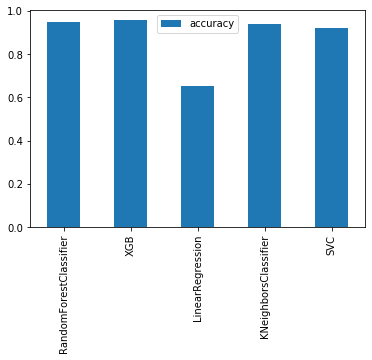

In [30]:
model_compare = pd.DataFrame(model_results, index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning using a for loop

In [31]:
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 93.86%


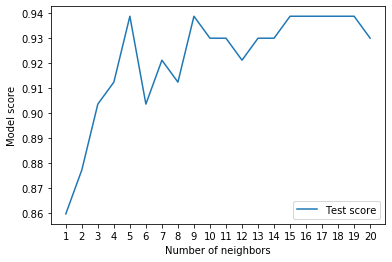

In [32]:
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* RandomForestClassifier()

...using RandomizedSearchCV

In [33]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 40, 2),
          'min_samples_leaf': np.arange(1, 40, 2)}

In [34]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [36]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9649122807017544

In [37]:
model_results

{'RandomForestClassifier': 0.9473684210526315,
 'XGB': 0.956140350877193,
 'LinearRegression': 0.6536446483035234,
 'KNeighborsClassifier': 0.9385964912280702,
 'SVC': 0.9210526315789473}

## Hyperparameter Tuning with GridSearchCV

Going to tune LogisticRegression model using GridSearchCV

In [38]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


In [39]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [40]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9385964912280702

In [41]:
model_results

{'RandomForestClassifier': 0.9473684210526315,
 'XGB': 0.956140350877193,
 'LinearRegression': 0.6536446483035234,
 'KNeighborsClassifier': 0.9385964912280702,
 'SVC': 0.9210526315789473}

In [42]:
# Let's try to improve RandomForestClassifier
# This time using GridSearchCV

# Create a new grid
rf_grid_2 = {'n_estimators': [400, 500, 600],
          'max_depth': [None, 5],
          'min_samples_split': [2, 6],
          'min_samples_leaf': [4]}

np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid_2,
                    cv=5,
                    verbose=True)

# Fit the grid
gs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   50.5s finished


In [44]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [45]:
# Score
gs_rf.score(X_test, y_test)

0.9649122807017544

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

First we need to make predictions.

In [46]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)

In [47]:
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [48]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: diagnosis, Length: 114, dtype: int64

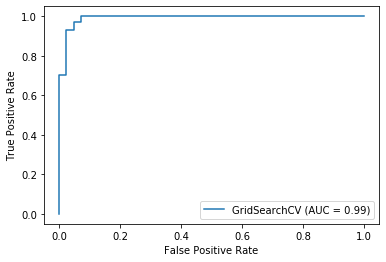

In [51]:
# Import ROC curve function and use it
plot_roc_curve(gs_rf, X_test, y_test)

In [54]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[41,  2],
       [ 2, 69]], dtype=int64)

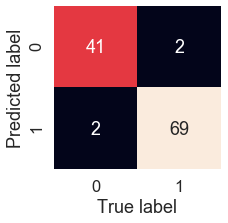

In [57]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [61]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [62]:
len(df)

569

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score using `cross_val_score()`

In [64]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [65]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators=600,
                            max_depth=None,
                             min_samples_leaf=4,
                             min_samples_split=2,
                            )

# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

cv_acc

array([0.88596491, 0.89473684, 0.94736842, 0.95614035, 0.92035398])

In [66]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9209129017233348

In [67]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.9197733896920888

In [68]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9634585289514866

In [70]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.9387526401988708

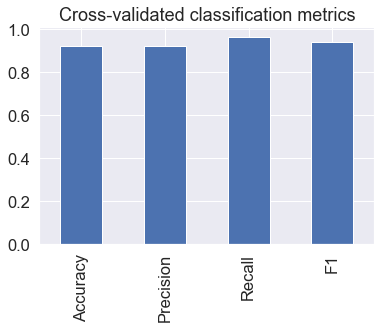

In [74]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

In [75]:
cv_metrics.T

,0
Accuracy,0.920913
Precision,0.919773
Recall,0.963459
F1,0.938753


## Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?

In [79]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [82]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [83]:
clf = LogisticRegression(C=788.0462815669904,
                        solver='liblinear')

clf.fit(X_train, y_train);

In [84]:
# Check coef_
clf.coef_

array([[ 6.10565124e+00, -3.02895871e-01, -6.72820453e-01,
        -3.16100859e-02, -7.24650466e+01]])

In [91]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'mean_radius': 6.1056512448670635,
 'mean_texture': -0.3028958707073018,
 'mean_perimeter': -0.6728204531436377,
 'mean_area': -0.031610085878376395,
 'mean_smoothness': -72.46504658986821}

In [88]:
clf.coef_[0] # remove nested list

array([ 6.10565124e+00, -3.02895871e-01, -6.72820453e-01, -3.16100859e-02,
       -7.24650466e+01])

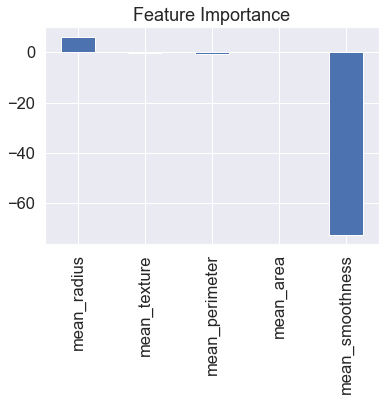

In [93]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

Goal has been achieved, although:

* Could we collect more data?
* CatBoost vs XGBoost?
* Could we improve current models even more?
* How can we export it and share it with others?